In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings ('ignore')

In [4]:
ipl_auc_df = pd.read_csv(r"C:\Users\hp\Downloads\IPL IMB381IPL2013.csv")

In [5]:
ipl_auc_df

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000


In [6]:
X_features = ['AGE','COUNTRY', 'PLAYING ROLE','T-RUNS','T-WKTS','ODI-RUNS-S',
'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL','CAPTAINCY EXP', 'RUNS-S', 'HS',
'AVE', 'SR-B', 'SIXERS', 'RUNS-C','WKTS','AVE-BL', 'ECON', 'SR-BL']

In [7]:
import statsmodels.api as sm

In [8]:
cat_cols = ['AGE','COUNTRY', 'PLAYING ROLE','CAPTAINCY EXP']

In [9]:
ipl_auc_df_encode = pd.get_dummies(ipl_auc_df[X_features],columns=cat_cols,drop_first=True)

In [11]:
ipl_auc_df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   T-RUNS                  130 non-null    int64  
 1   T-WKTS                  130 non-null    int64  
 2   ODI-RUNS-S              130 non-null    int64  
 3   ODI-SR-B                130 non-null    float64
 4   ODI-WKTS                130 non-null    int64  
 5   ODI-SR-BL               130 non-null    float64
 6   RUNS-S                  130 non-null    int64  
 7   HS                      130 non-null    int64  
 8   AVE                     130 non-null    float64
 9   SR-B                    130 non-null    float64
 10  SIXERS                  130 non-null    int64  
 11  RUNS-C                  130 non-null    int64  
 12  WKTS                    130 non-null    int64  
 13  AVE-BL                  130 non-null    float64
 14  ECON                    130 non-null    fl

In [62]:
X_features = ipl_auc_df_encode.columns
X_features

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [63]:
X = sm.add_constant(ipl_auc_df_encode)

In [64]:
X

,const,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,1.000,0,0,0,0.000,0,0.000,0,0,0.000,...,0,0,1,0,0,0,0,0,0,0
1,1.000,214,18,657,71.410,185,37.600,0,0,0.000,...,0,0,0,0,0,0,0,1,0,0
2,1.000,571,58,1269,80.620,288,32.900,167,39,18.560,...,0,0,0,0,0,0,0,1,0,0
3,1.000,284,31,241,84.560,51,36.800,58,11,5.800,...,0,0,0,0,0,0,0,1,0,0
4,1.000,63,0,79,45.930,0,0.000,1317,71,32.930,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1.000,0,0,0,0.000,0,0.000,49,16,9.800,...,0,0,0,0,0,0,1,0,0,0
126,1.000,6398,7,6814,75.780,3,86.600,3,3,3.000,...,0,1,0,0,0,0,1,0,0,1
127,1.000,1775,9,8051,87.580,109,44.300,1237,66,26.320,...,0,0,0,0,0,0,1,0,0,1
128,1.000,1114,288,790,73.550,278,35.400,99,23,9.900,...,0,0,0,0,0,0,0,1,0,0


In [26]:
Y = ipl_auc_df['SOLD PRICE']

In [27]:
from sklearn.model_selection import train_test_split

In [65]:
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,train_size=0.8,random_state=42)

In [67]:
ipl_model_1 = sm.OLS(train_Y,train_X).fit()

In [68]:
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2023-10-28 19:41        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

In [45]:
ypred1 = ipl_model_1.predict(test_X)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
ypred1

55     371913.566
40     133245.481
19     771536.915
31     260320.730
115    161746.529
56     311878.993
69     559071.567
105    492632.527
81     909017.894
26    1404119.314
95     697765.561
27     861657.497
64     482163.460
4      782101.539
97    1120343.543
100    200163.730
36     300425.928
80     335355.572
93     870694.957
84     626454.241
18     727199.689
10     664079.248
120    585915.468
11     304430.545
126    398157.786
45     223461.064
dtype: float64

In [47]:
len(test_X)

26

In [50]:
df_comparision = pd.concat([test_Y,ypred1],axis=1)

In [51]:
df_comparision

,SOLD PRICE,0
55,900000,371913.566
40,150000,133245.481
19,300000,771536.915
31,325000,260320.730
115,150000,161746.529
56,225000,311878.993
69,600000,559071.567
105,625000,492632.527
81,925000,909017.894
26,800000,1404119.314


In [52]:
df_comparision.columns=['Actual_Price','Predicted_price']

In [53]:
df_comparision['percentage_diff'] = ((df_comparision['Actual_Price']-df_comparision['Predicted_price'])/df_comparision['Actual_Price'])*100

In [54]:
df_comparision

,Actual_Price,Predicted_price,percentage_diff
55,900000,371913.566,58.676
40,150000,133245.481,11.170
19,300000,771536.915,-157.179
31,325000,260320.730,19.901
115,150000,161746.529,-7.831
56,225000,311878.993,-38.613
69,600000,559071.567,6.821
105,625000,492632.527,21.179
81,925000,909017.894,1.728
26,800000,1404119.314,-75.515


In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['Values'] = [variance_inflation_factor(dataset.values,i)
                      for i in range(dataset.shape[1])]
    return vif

In [71]:
X[X_features]

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.000,0,0.000,0,0,0.000,0.000,...,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71.410,185,37.600,0,0,0.000,0.000,...,0,0,0,0,0,0,0,1,0,0
2,571,58,1269,80.620,288,32.900,167,39,18.560,121.010,...,0,0,0,0,0,0,0,1,0,0
3,284,31,241,84.560,51,36.800,58,11,5.800,76.320,...,0,0,0,0,0,0,0,1,0,0
4,63,0,79,45.930,0,0.000,1317,71,32.930,120.710,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0,0,0.000,0,0.000,49,16,9.800,125.640,...,0,0,0,0,0,0,1,0,0,0
126,6398,7,6814,75.780,3,86.600,3,3,3.000,42.850,...,0,1,0,0,0,0,1,0,0,1
127,1775,9,8051,87.580,109,44.300,1237,66,26.320,131.880,...,0,0,0,0,0,0,1,0,0,1
128,1114,288,790,73.550,278,35.400,99,23,9.900,91.670,...,0,0,0,0,0,0,0,1,0,0


In [72]:
vif_factor = calculate_vif(X[X_features])

In [73]:
vif_factor

,Features,Values
0,T-RUNS,12.613
1,T-WKTS,7.679
2,ODI-RUNS-S,16.426
3,ODI-SR-B,13.829
4,ODI-WKTS,9.952
5,ODI-SR-BL,4.427
6,RUNS-S,16.135
7,HS,22.781
8,AVE,25.227
9,SR-B,21.576


In [74]:
columns_with_large_vif = vif_factor[vif_factor.Values>4].Features

In [75]:
columns_with_large_vif

0                   T-RUNS
1                   T-WKTS
2               ODI-RUNS-S
3                 ODI-SR-B
4                 ODI-WKTS
5                ODI-SR-BL
6                   RUNS-S
7                       HS
8                      AVE
9                     SR-B
10                  SIXERS
11                  RUNS-C
12                    WKTS
13                  AVE-BL
14                    ECON
15                   SR-BL
16                   AGE_2
20             COUNTRY_IND
27    PLAYING ROLE_Batsman
30         CAPTAINCY EXP_1
Name: Features, dtype: object

In [76]:
len(columns_with_large_vif)

20

In [77]:
X[columns_with_large_vif]

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AGE_2,COUNTRY_IND,PLAYING ROLE_Batsman,CAPTAINCY EXP_1
0,0,0,0,0.000,0,0.000,0,0,0.000,0.000,0,307,15,20.470,8.900,13.930,1,0,0,0
1,214,18,657,71.410,185,37.600,0,0,0.000,0.000,0,29,0,0.000,14.500,0.000,1,0,0,0
2,571,58,1269,80.620,288,32.900,167,39,18.560,121.010,5,1059,29,36.520,8.810,24.900,1,1,0,0
3,284,31,241,84.560,51,36.800,58,11,5.800,76.320,0,1125,49,22.960,6.230,22.140,0,1,0,0
4,63,0,79,45.930,0,0.000,1317,71,32.930,120.710,28,0,0,0.000,0.000,0.000,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0,0,0.000,0,0.000,49,16,9.800,125.640,2,0,0,0.000,0.000,0.000,1,1,1,0
126,6398,7,6814,75.780,3,86.600,3,3,3.000,42.850,0,0,0,0.000,0.000,0.000,1,0,1,1
127,1775,9,8051,87.580,109,44.300,1237,66,26.320,131.880,67,569,23,24.740,7.020,21.130,1,1,1,1
128,1114,288,790,73.550,278,35.400,99,23,9.900,91.670,1,1783,65,27.430,7.750,21.260,1,1,0,0


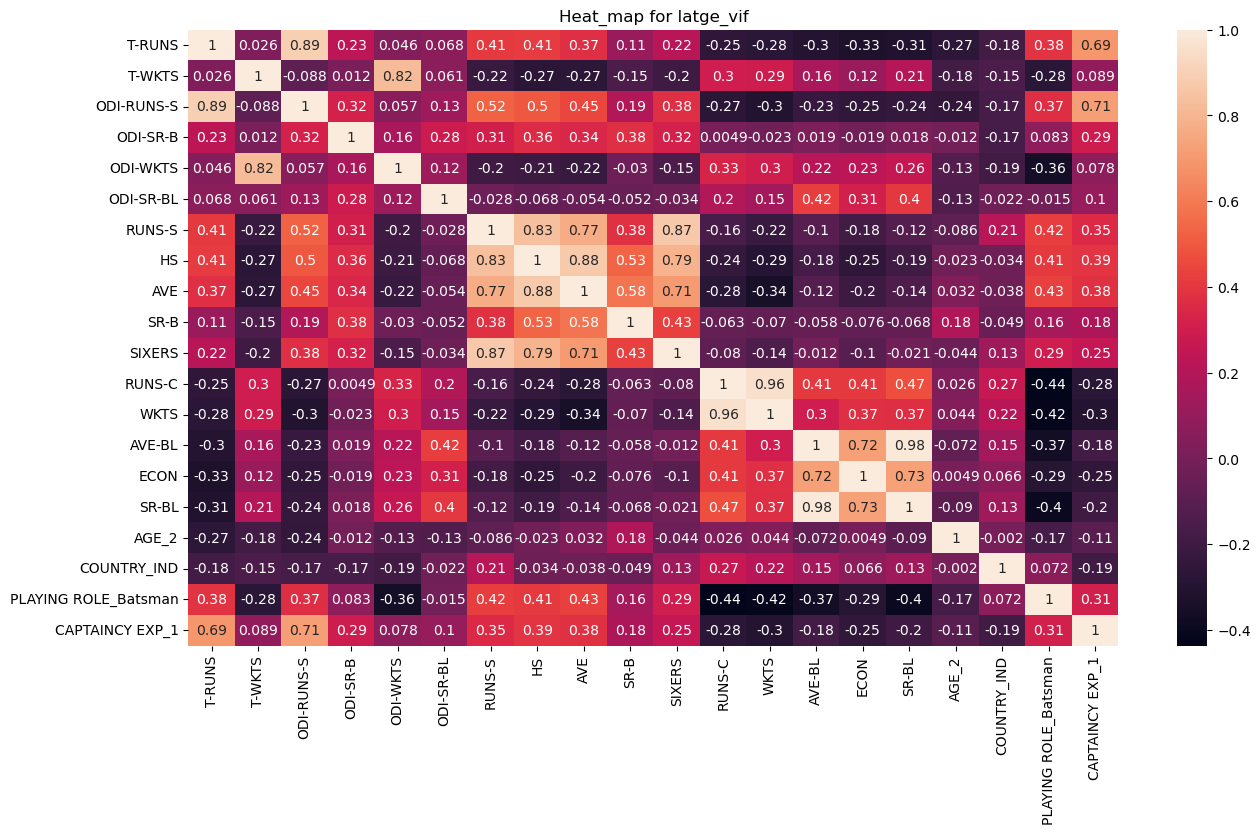

In [80]:
plt.figure(figsize=(15,8))
sns.heatmap(X[columns_with_large_vif].corr(),annot=True)
plt.title("Heat_map for latge_vif")
plt.show()

In [85]:
X[columns_with_large_vif].columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'COUNTRY_IND', 'PLAYING ROLE_Batsman',
       'CAPTAINCY EXP_1'],
      dtype='object')

In [86]:
columns_to_be_removed = ['T-RUNS','T-WKTS','RUNS-S', 
                         'HS', 'AVE','RUNS-C','SR-B',
                         'AVE-BL','ECON','ODI-SR-B','ODI-RUNS-S','AGE_2','SR-BL' ]

In [88]:
X_new_Features = list(set(X_features)-set(columns_to_be_removed))

In [89]:
X[X_new_Features]

,COUNTRY_PAK,COUNTRY_ENG,WKTS,SIXERS,COUNTRY_SA,COUNTRY_SL,COUNTRY_ZIM,COUNTRY_WI,PLAYING ROLE_W. Keeper,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,COUNTRY_BAN,ODI-WKTS,COUNTRY_IND,AGE_3,CAPTAINCY EXP_1,COUNTRY_NZ,ODI-SR-BL
0,0,0,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000
1,0,0,0,0,0,0,0,0,0,0,1,1,185,0,0,0,0,37.600
2,0,0,29,5,0,0,0,0,0,0,1,0,288,1,0,0,0,32.900
3,0,0,49,0,0,0,0,0,0,0,1,0,51,1,0,0,0,36.800
4,0,0,0,28,0,0,0,0,0,1,0,0,0,1,0,0,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0.000
126,1,0,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,86.600
127,0,0,23,67,0,0,0,0,0,1,0,0,109,1,0,1,0,44.300
128,0,0,65,1,0,0,0,0,0,0,1,0,278,1,0,0,0,35.400


In [127]:
X_new = sm.add_constant(X[X_new_Features])

In [128]:
calculate_vif(X_new)

,Features,Values
0,const,14.576
1,COUNTRY_PAK,1.467
2,COUNTRY_ENG,1.224
3,WKTS,1.858
4,SIXERS,1.609
5,COUNTRY_SA,1.636
6,COUNTRY_SL,1.577
7,COUNTRY_ZIM,1.211
8,COUNTRY_WI,1.276
9,PLAYING ROLE_W. Keeper,2.071


In [132]:
train_X =train_X[X_new_Features]

In [133]:
train_X

,COUNTRY_PAK,COUNTRY_ENG,WKTS,SIXERS,COUNTRY_SA,COUNTRY_SL,COUNTRY_ZIM,COUNTRY_WI,PLAYING ROLE_W. Keeper,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,COUNTRY_BAN,ODI-WKTS,COUNTRY_IND,AGE_3,CAPTAINCY EXP_1,COUNTRY_NZ,ODI-SR-BL
70,0,0,24,0,0,0,0,0,0,0,1,0,1,0,1,0,0,42.000
78,0,0,11,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.000
47,0,0,0,28,0,0,0,0,1,0,0,0,0,1,0,0,0,0.000
0,0,0,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000
12,0,0,73,9,0,0,0,0,0,0,0,0,32,1,0,0,0,41.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,7,19,0,0,0,0,0,0,0,0,0,1,0,0,0,0.000
106,0,0,59,1,1,0,0,0,0,0,1,0,91,0,0,0,0,33.700
14,0,0,4,36,0,0,0,0,0,1,0,0,0,1,0,0,0,0.000
92,0,0,0,1,0,0,0,1,0,1,0,0,16,0,0,0,0,36.300


In [134]:
ipl_model_2 = sm.OLS(train_Y, train_X).fit()

In [135]:
ipl_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             SOLD PRICE   R-squared (uncentered):                   0.775
Model:                            OLS   Adj. R-squared (uncentered):              0.728
Method:                 Least Squares   F-statistic:                              16.49
Date:                Sat, 28 Oct 2023   Prob (F-statistic):                    1.13e-20
Time:                        21:03:44   Log-Likelihood:                         -1464.6
No. Observations:                 104   AIC:                                      2965.
Df Residuals:                      86   BIC:                                      3013.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
COUNTRY_PAK             1.228e+05    1.6e+05      0.769      0.444   -1.94e+05     4.4e+05
COUNTRY_ENG             6.829e+05   2.16e+05      3.160      0.002    2.53e+05    1.11e+06
WKTS                    2431.8988   2105.352      1.155      0.251   -1753.403    6617.201
SIXERS                  7862.1259   2086.610      3.768      0.000    3714.082     1.2e+04
COUNTRY_SA              1.087e+05   1.15e+05      0.945      0.347    -1.2e+05    3.38e+05
COUNTRY_SL              5.591e+04   1.42e+05      0.393      0.695   -2.27e+05    3.39e+05
COUNTRY_ZIM            -6.798e+04   3.91e+05     -0.174      0.862   -8.45e+05    7.09e+05
COUNTRY_WI             -2.223e+04   2.13e+05     -0.104      0.917   -4.46e+05    4.01e+05
PLAYING ROLE_W. Keeper -5.512e+04    1.7e+05     -0.324      0.746   -3.93e+05    2.83e+05
PLAYING ROLE_Batsman    1.214e+05   1.07e+05      1.138      0.258   -9.07e+04    3.33e+05
PLAYING ROLE_Bowler    -1.832e+04   1.06e+05     -0.173      0.863   -2.29e+05    1.92e+05
COUNTRY_BAN            -1.088e+05   3.69e+05     -0.295      0.769   -8.43e+05    6.25e+05
ODI-WKTS                 772.4088    470.635      1.641      0.104    -163.183    1708.001
COUNTRY_IND             2.828e+05   9.62e+04      2.940      0.004    9.16e+04    4.74e+05
AGE_3                  -8950.6659    9.8e+04     -0.091      0.927   -2.04e+05    1.86e+05
CAPTAINCY EXP_1         2.084e+05   9.81e+04      2.124      0.037    1.33e+04    4.03e+05
COUNTRY_NZ               1.43e+05   1.52e+05      0.942      0.349   -1.59e+05    4.45e+05
ODI-SR-BL                909.0021   1267.497      0.717      0.475   -1610.698    3428.703
==============================================================================
Omnibus:                        8.635   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.345
Skew:                           0.623   Prob(JB):                       0.0154
Kurtosis:                       3.609   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
significant_vars = ['COUNTRY_ENG', 'COUNTRY_IND', 'SIXERS', 'CAPTAINCY EXP_1']

In [137]:
train_X = train_X[significant_vars]

In [138]:
ipl_model_3 = sm.OLS(train_Y, train_X).fit()

In [139]:
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2023-10-28 21:06 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

In [140]:
ipl_model_3.resid

70     650000.000
78    -292890.254
47    -104749.618
0       50000.000
12     -65630.764
          ...    
71     247990.892
106    316362.166
14    -398852.293
92     216362.166
102   -107308.026
Length: 104, dtype: float64

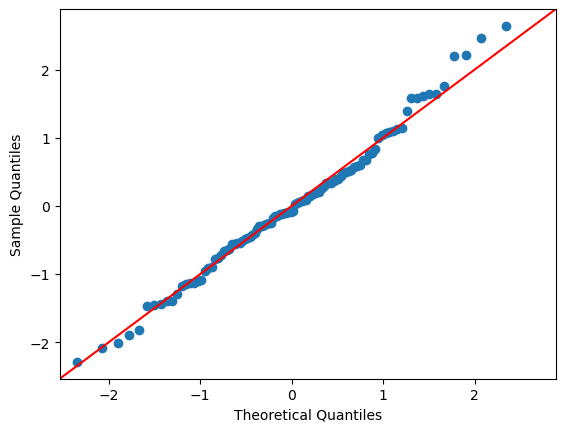

In [142]:
sm.qqplot(ipl_model_3.resid,line='45',fit=True);

In [175]:
def get_standarise_value(vals):
    return (vals-vals.mean())/vals.std()

In [144]:
def plot_resid_fitted(fitted,resid,title):
    plt.scatter(get_standarise_value(fitted),get_standarise_value(resid))
    plt.title(title)
    plt.xlabel('standarise predicted value')
    plt.ylabel('standarise Residual value')
    plt.show()

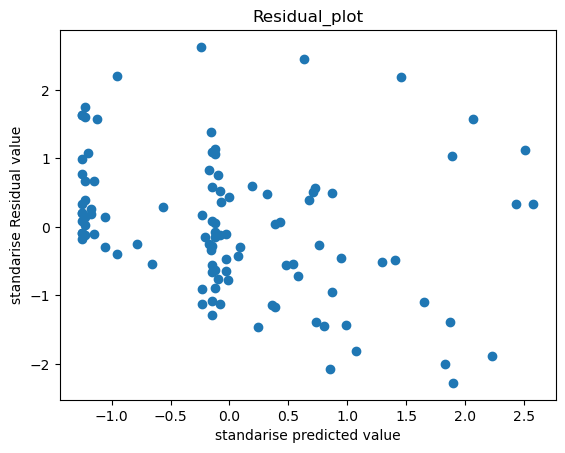

In [145]:
plot_resid_fitted(ipl_model_3.fittedvalues,ipl_model_3.resid,"Residual_plot")

In [149]:
print(train_X.shape)
k = train_X.shape[1]
n = train_X.shape[0]

(104, 4)


In [151]:
print("Number of variable:",k,"\n","Number of observation",n)

Number of variable: 4 
 Number of observation 104


In [152]:
leverage_cut_off = 3*(k+1)/n

In [153]:
print("Cutoff for Leverage Value:", round(leverage_cut_off,3))

Cutoff for Leverage Value: 0.144


In [154]:
from statsmodels.graphics.regressionplots import influence_plot

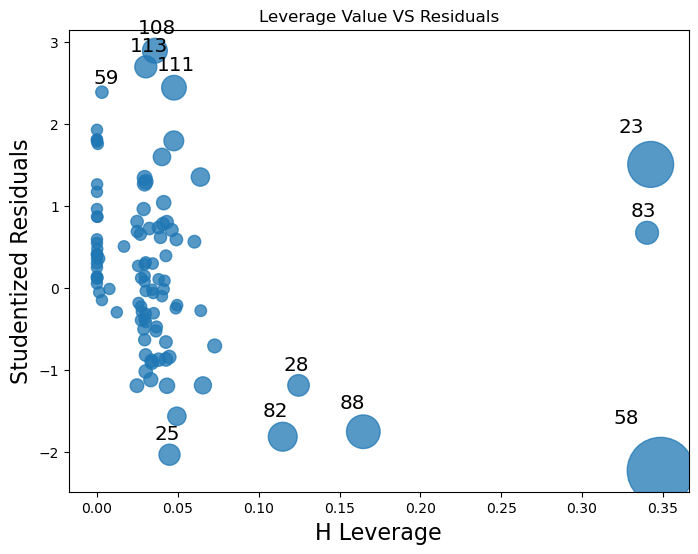

In [174]:

from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize = (8,6))
influence_plot(ipl_model_3, ax = ax)
plt.title("Leverage Value VS Residuals")
plt.show()

In [159]:
ipl_auc_df[ipl_auc_df.index.isin([23,58,83,88])]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.820,...,116.980,2,105,2,52.500,9.550,33.000,2009,950000,1550000
58,59,"Mascarenhas, AD",2,ENG,RR+,Allrounder,0,0,245,95.330,...,101.370,1,331,19,17.420,7.010,14.950,2011,100000,100000
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.760,...,141.200,30,215,7,30.710,7.410,24.860,2009,1350000,1550000
88,89,"Raina, SK",1,IND,CSK,Batsman,710,13,3525,92.710,...,139.390,97,678,20,33.900,7.050,28.900,2008,125000,650000


In [160]:
train_X_new = train_X.drop([23,58,83,88], axis = 0)
train_Y_new = train_Y.drop([23,58,83,88], axis = 0)

In [162]:
print(train_X_new)
print(train_Y_new)

     COUNTRY_ENG  COUNTRY_IND  SIXERS  CAPTAINCY EXP_1
70             0            0       0                0
78             0            1       0                0
47             0            1      28                0
0              0            0       0                0
12             0            1       9                0
..           ...          ...     ...              ...
71             0            1      19                0
106            0            0       1                0
14             0            1      36                0
92             0            0       1                0
102            0            0      24                0

[100 rows x 4 columns]
70     650000
78      95000
47     525000
0       50000
12     400000
        ...  
71     800000
106    325000
14     300000
92     225000
102    100000
Name: SOLD PRICE, Length: 100, dtype: int64


In [169]:
ipl_model_4 = sm.OLS(train_Y_new,train_X_new).fit()

In [170]:
ipl_model_4.summary2 ()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.696     
Dependent Variable:     SOLD PRICE       AIC:                         2841.5546 
Date:                   2023-10-28 21:50 BIC:                         2849.3701 
No. Observations:       100              Log-Likelihood:              -1417.8   
Df Model:               3                F-statistic:                 77.33     
Df Residuals:           97               Prob (F-statistic):          1.26e-25  
R-squared (uncentered): 0.705            Scale:                       1.2457e+11
--------------------------------------------------------------------------------
                       Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
--------------------------------------------------------------------------------
COUNTRY_ENG              0.0000     0.0000    nan    nan      0.0000      0.0000
COUNTRY_IND         387924.6265 61366.7462 6.3214 0.0000 266128.6225 509720.6304
SIXERS               10029.1011  1770.0111 5.6661 0.0000   6516.1191  13542.0831
CAPTAINCY EXP_1     303734.7027 75592.1328 4.0181 0.0001 153705.2441 453764.1614
--------------------------------------------------------------------------------
Omnibus:                   1.568             Durbin-Watson:                2.205
Prob(Omnibus):             0.457             Jarque-Bera (JB):             1.115
Skew:                      0.241             Prob(JB):                     0.573
Kurtosis:                  3.185             Condition No.:                inf  
================================================================================
* The condition number is large (inf). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [171]:
pred_y  = ipl_model_4.predict(test_X[train_X_new.columns])
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pred_y

55      60174.607
40     418011.930
19     351018.539
31      30087.303
115     50145.506
56      90261.910
69          0.000
105    387924.626
81     728914.064
26    1597488.747
95     397953.728
27     614636.837
64     418011.930
4      668739.458
97    1210310.918
100     10029.101
36     110320.112
80     518302.941
93    1483958.317
84     383967.512
18     922328.655
10     381105.842
120    323792.905
11     303734.703
126    303734.703
45      80232.809
dtype: float64

In [172]:
ipl_model_3.fittedvalues

70         0.000
78    387890.254
47    629749.618
0          0.000
12    465630.764
         ...    
71    552009.108
106     8637.834
14    698852.293
92      8637.834
102   207308.026
Length: 104, dtype: float64